# Scikit-Learn_Workshop_2-Supervized_Learning-Classification_Models
###  *2018/06/04*

=================================
### [ REFERENCE ]  :   

1. #### [05.03-Hyperparameters-and-Model-Validation.ipynb - by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)
2. #### [05.02-Introducing-Scikit-Learn.ipynb - by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)
    - Both Python notebook files are available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook); the content can be found in the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas.
3. #### Brett Lanz, [Machine Learning with R, 2nd ed.](https://github.com/devharsh/Technical-eBooks/blob/master/Machine%20Learning%20with%20R%2C%202nd%20Edition.pdf) Chapter 3, "Example-diagnosing breast cancer with the kNN algorithm", 2015.

------------------------------------


# A. Nearest Neighbor Classifier
## [ EXAMPLE A ] : Predicting Breast Cancer Diagnosis  

 -  Breast Cancer Wisconsin (Original) Dataset - UCI : `wisc_bc_data.csv`
 -  Sklearn Nearest Neighbor Classifier
- [1.  Importing Raw Data](#1.  Importing Raw Data)
- [2.  產生 feature dataset [X] 和 labeled data [y]](#2.  產生 feature dataset 和 labeled data)
- [3.  Supervised learning example: kNN classification](#3.  Supervised learning example: kNN classification)
    - [ EXERCISE A.1  :  如何改進其預測準確率 (accuracy score) 呢？](# EXERCISE A.1  :   如何改進其預測準確率呢？)
- [4. Cross-validations for kNN model with Breast Cancer Wiscosin Dataset](#4. Cross-validations for kNN model with Breast Cancer Wiscosin Dataset)
    - [ EXERCISE A.2  :  如何改進其預測準確率 (accuracy score) 呢？ PART 2](# EXERCISE A.2  :   如何改進其預測準確率呢？ PART 2) 

<a id='1. Importing Raw Data'></a>
### 1.  Importing Raw Data
### [ Breast Cancer Wisconsin (Original) Data Set ] : wisc_bc_data.csv

- from UCI Machine Learning Repository :
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

In [90]:
import numpy as np
import pandas as pd
wsbc = pd.read_csv("wisc_bc_data.csv")   ##  Read & save the dataset as a data frame...
wsbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [91]:
wsbc.describe(include='all')  ##  Raw data including 569 samples and 32 variables

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


<a id='2.  產生 feature dataset 和 labeled data'></a>
### 2.  產生 feature dataset [X] 和 labeled data [y]

In [92]:
y = wsbc['diagnosis']
X = wsbc.drop('id',  axis=1)         ##  Drop the column 'id' ...
X = X.drop('diagnosis', axis = 1)    ##  Drop the column 'diagnosis' for the feature matrix.
## X.head()
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [93]:
## Normalizing the training dataset ...
##   Scikit-learning.org : "4.3.1.1. Scaling features to a range" 
##   http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [98]:
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#####   
<a id='3.  Supervised learning example: kNN classification'></a>
### 3.  Supervised learning example: kNN classification

- #### Build the kNN model.

In [99]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

- #### Split the raw data into the training & testing datasets.

In [100]:
from sklearn.model_selection import train_test_split
# split the data with 75% in training dataset
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.85, test_size=0.15)

- #### Fit the model with the training dataset.

In [101]:
model.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

- #### Predict the result from the model with the features of the tresting dataset.

In [102]:
y2_model = model.predict(X2)

- #### Evaluate the model with the labeled data from the testing dataset.

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y2, y2_model)

0.9418604651162791

- #### Compute & plot the confusion matrix to evaluate the accuracy of the kNN classifier.

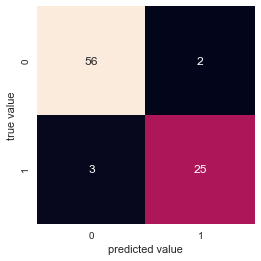

In [104]:
# Compute the confusion matrix...
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y2, y2_model)

# Plot the confusion matrix as a color-encoded matrix...
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

---------------------------------

<a id=' EXERCISE A.1  :   如何改進其預測準確率呢？'></a>
### [ EXERCISE A.1 ] :   如何改進其預測準確率 (accuracy score) 呢？
[ HINT] :
- Re-evaluate the model by changing the parameter `n_neighbors` in the `KNeighborsClassifier()` model.  
    - (e.g., *`n_neighbors=3, 5, 21, ...`*)
    
    
- Re-evaluate the model by changing the parameter settings in the `train_test_split()`, such as `random_state`, `train_size`, `test_size`, etc.
    - e.g., *`random_state=1, train_size=0.8, test_size=0.2`*

---------------------------------

 
<a id='4. Cross-validations for kNN model with Breast Cancer Wiscosin Dataset'></a>
### 4. Cross-validations for kNN model with Breast Cancer Wiscosin Dataset
- #### [Scheme 1] : Split the data into five groups and evaluate the accuracy scores with `cross_val_score()`

In [105]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.94782609, 0.96521739, 0.9380531 , 0.95575221, 0.96460177])

- #### [Scheme 2] : Leave-One-Out cross validation with `LeaveOneOut()`

In [106]:
from sklearn.cross_validation import LeaveOneOut
score_ones = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
print(score_ones.shape)
score_ones

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(569,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

- The leave-one-out cross-validation scores the successful (1.0) or unsuccessful (0.0) prediction result for 569 trials. 
- Accordingly, calculating the mean value of these scores to estimate the error rate as following:

In [107]:
score_ones.mean()

0.9525483304042179

---------------------------------

<a id=' EXERCISE A.2  :   如何改進其預測準確率呢？ PART 2'></a>
## [ EXERCISE A.2 ] : 如何改進其預測準確率呢？ PART 2
- ### Data Transformation - Normalization/Standardization
   -  一般而言，當資料中的各特徵變數(feature variable)數據範圍差異過大時，通常會先行將所有特徵變數重新正規化(normalization，使其範圍介於 0 與 1 之間)，或者透過計算其 z-score 來重新進行資料的標準化(standardization)。[參考：Reference 3 的 Chapter 3 - Example]

A. 請依據上列敘述，重新將 wisc_bc_data.csv 的資料，先分別

(1) 正規化(normalization，使其範圍介於 0 與 1 之間)

(2) 標準化(standardization with z-score)

之後，分別計算其預測準確率(accuracy score)結果，並比較其差異。

- [ HINT ]:
    - 可以分別撰寫 Python 函數，執行資料正規化(normalization) 和 標準化(standardization with z-score)。
    - 是否可以使用 sklearn 的 Pipeline 以及相關函式來執行資料轉換和建立建立模型呢？

B. 同時，將上述兩項資料轉換後的 kNN 模型，分別進行 cross-validation！

---------------------------------

#####     
# B. Naive Bayes Classifier  
 - #### Gaussian Naive Bayes
 - #### Multinomial Naive Bayes
 - #### Bernoulli Naive Bayes
 
( Ref. Sklearn - Naive Bayes : http://scikit-learn.org/stable/modules/naive_bayes.html )

## [ EXAMPLE B ] : Gaussian Naive Bayes Classifier

Accuracy Score =  0.96


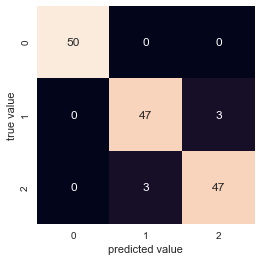

In [14]:
##  Loading iris dataset...
from sklearn import datasets
iris = datasets.load_iris()

## Building GaussianNB estimator...
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
# iris.target
# y_pred

from sklearn.metrics import accuracy_score
print('Accuracy Score = ', accuracy_score(iris.target, y_pred))

# Compute the confusion matrix...
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(iris.target, y_pred)

# Plot the confusion matrix as a color-encoded matrix...
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

####    
###  [ Exercise B.1 ] :  From the [ EXAMPLE B ] above
(1) Using `train_test_split` to rebuild the GaussianNB Estimator for `iris` dataset.

(2) Doing the cross-validation for checking the accuracy_scores.
 - [ HINT ] -  Ref :  “05.02-Introducing-Scikit-Learn” from the Python Data Science Handbook by Jake VanderPlas 

#####     
# C. Decision Trees Classifier  
 - #### Classification
 -  Regression - `DecisionTreeRegressor`
 -  Multi-output problems
 
( Ref. Sklearn - Naive Bayes :  http://scikit-learn.org/stable/modules/tree.html )

In [110]:
from sklearn.datasets import load_iris
iris = load_iris()

##  Building the Decision Tree Classifier...
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

### Export the decision tree in `Graphviz` format using the `export_graphviz` exporter. 

In [111]:
## Exporting the tree in Graphviz format using the export_graphviz exporter...
## 
## [ How to install Graphviz? ]
##  If you use the conda package manager, the graphviz binaries and the python package can be installed with
##
##     conda install python-graphviz
##
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

###  Visualizing the decision tree...

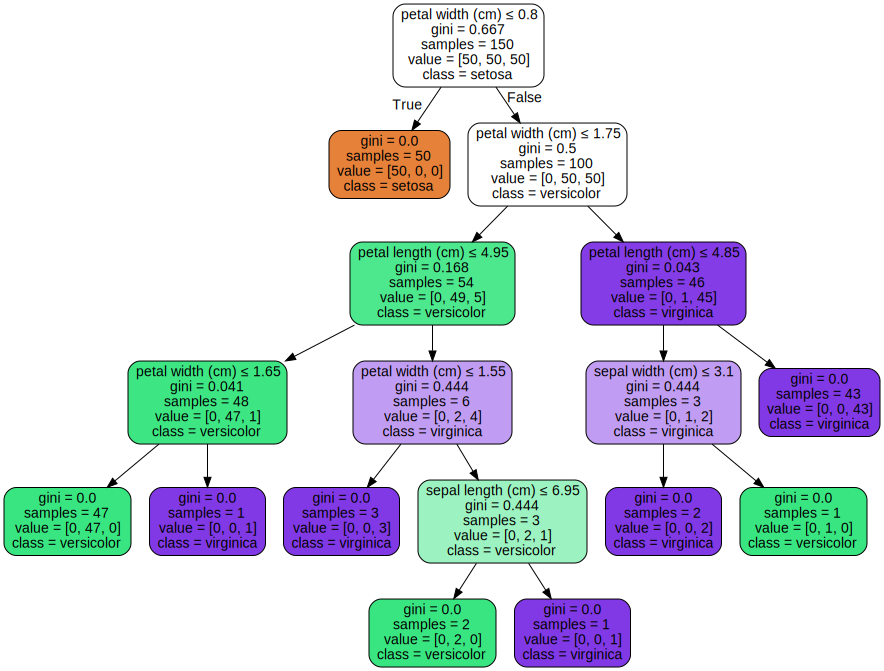

In [112]:
##  Visualizing the decision tree...
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#####  
### Plot the decision surface of a decision tree trained on pairs of features of the iris dataset.
 - Code from http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py
 - #### For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

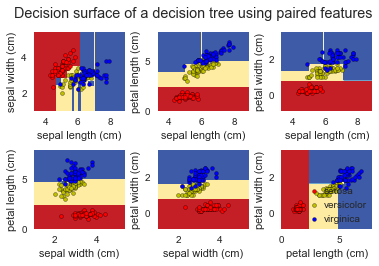

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

#####     
# D. Logistic Regression Classifier  
Ref. : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

In [19]:
print(__doc__)

from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

##  [ Output ] :
##  KNN score: 0.961111
##  LogisticRegression score: 0.938889

Automatically created module for IPython interactive environment
KNN score: 0.961111
LogisticRegression score: 0.938889
